# **Trabalho de Pós-graduação em IA para DEVs (FIAP)**

**Objetivos:**

*   Implementar algoritmos de regressão para prever custos de convênio médico
*   Realizar pré-processamento dos dados
*   Comparar 2 ou mais algoritmos de regressão

**Conclusão:**

O modelo de dados selecionado não é integro, sendo que o custo está 97% relacionado peso do cliente, e nem o IMC possui relação com o peso

**Solução:**

Realizar o trabalho com outro modelo de dados

# **Dados referentes ao Dataset: Medical insurance prediction dataset**

A decisão inicial foi trabalhar com este Dataset devido às suas dimenções (25000, 24), onde será possível passar por um numero maior de situações e tratamento de dados

https://www.kaggle.com/datasets/karthikeyanrajuz/medical-insurance-prediction-dataset

# **Importações de bobliotecas**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Carga de dados**

In [3]:
dados = pd.read_excel('content\\Dataset.xlsx')

# **Simplificando o nome dos campos**

In [4]:
print(dados.columns)

Index(['patient_id', 'patient_years_with_insurance_with_us',
       'patient_last_year_regular_checkup',
       'patient_participates_in_adventure_sports', 'patient_occupation',
       'patient_visited_doctor_last_1_year', 'patient_cholesterol_level',
       'patient_average_daily_steps', 'patient_age',
       'patient_has_heart_disease_history',
       'patient_has_other_major_disease_history', 'patient_gender',
       'patient_average_glucose_level', 'patient_body_mass_index',
       'patient_smoking_status', 'patient_year_last_admitted',
       'patient_location', 'patient_weight',
       'patient_covered_by_other_insurance_company',
       'patient_alcohol_consumption', 'patient_exercise_regimen',
       'patient_weight_change_last_year', 'patient_body_fat_percentage',
       'patient_insurance_cost'],
      dtype='object')


In [5]:
nome_simplificado = [
    'id',
    'anos_conosco',
    'checkup_ultimo_ano',
    'esportes_radicais',
    'ocupacao',
    'medico_ultimo_ano',
    'colesterol',
    'passos_diarios',
    'idade',
    'doencas_cardiacas',
    'doencas_graves',
    'genero',
    'glicose',
    'imc',
    'tabagismo',
    'ano_ultima_internacao',
    'localizacao',
    'peso',
    'outro_seguro',
    'alcool',
    'exercicios',
    'variacao_peso_ultimo_ano',
    'percentual_gordura',
    'valor'
]

dados.columns = nome_simplificado

print (dados.columns)

Index(['id', 'anos_conosco', 'checkup_ultimo_ano', 'esportes_radicais',
       'ocupacao', 'medico_ultimo_ano', 'colesterol', 'passos_diarios',
       'idade', 'doencas_cardiacas', 'doencas_graves', 'genero', 'glicose',
       'imc', 'tabagismo', 'ano_ultima_internacao', 'localizacao', 'peso',
       'outro_seguro', 'alcool', 'exercicios', 'variacao_peso_ultimo_ano',
       'percentual_gordura', 'valor'],
      dtype='object')


# **Visão geral dos dados**

In [6]:
dados.shape

(25000, 24)

In [7]:
# Mostrar todas as colunas ao exibir DataFrames
pd.set_option('display.max_columns', None)

dados.head()

,id,anos_conosco,checkup_ultimo_ano,esportes_radicais,ocupacao,medico_ultimo_ano,colesterol,passos_diarios,idade,doencas_cardiacas,doencas_graves,genero,glicose,imc,tabagismo,ano_ultima_internacao,localizacao,peso,outro_seguro,alcool,exercicios,variacao_peso_ultimo_ano,percentual_gordura,valor
0,222302,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,145132,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,244767,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,85953,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,18163,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        25000 non-null  int64  
 1   anos_conosco              25000 non-null  int64  
 2   checkup_ultimo_ano        25000 non-null  int64  
 3   esportes_radicais         25000 non-null  int64  
 4   ocupacao                  25000 non-null  object 
 5   medico_ultimo_ano         25000 non-null  int64  
 6   colesterol                25000 non-null  object 
 7   passos_diarios            25000 non-null  int64  
 8   idade                     25000 non-null  int64  
 9   doencas_cardiacas         25000 non-null  int64  
 10  doencas_graves            25000 non-null  int64  
 11  genero                    25000 non-null  object 
 12  glicose                   25000 non-null  int64  
 13  imc                       24010 non-null  float64
 14  tabagi

In [9]:
dados.describe()

,id,anos_conosco,checkup_ultimo_ano,esportes_radicais,medico_ultimo_ano,passos_diarios,idade,doencas_cardiacas,doencas_graves,glicose,imc,ano_ultima_internacao,peso,variacao_peso_ultimo_ano,percentual_gordura,valor
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,126841.641800,4.089040,0.773680,0.081720,3.104200,5215.889320,44.918320,0.054640,0.098160,167.530000,31.393328,2003.892217,71.610480,2.517960,28.812280,27147.407680
std,70545.252727,2.606612,1.199449,0.273943,1.141663,1053.179748,16.107492,0.227281,0.297537,62.729712,7.876535,7.581521,9.325183,1.690335,8.632382,14323.691832
min,5014.000000,0.000000,0.000000,0.000000,0.000000,2034.000000,16.000000,0.000000,0.000000,57.000000,12.300000,1990.000000,52.000000,0.000000,11.000000,2468.000000
25%,65750.000000,2.000000,0.000000,0.000000,2.000000,4543.000000,31.000000,0.000000,0.000000,113.000000,26.100000,1997.000000,64.000000,1.000000,21.000000,16042.000000
50%,127088.000000,4.000000,0.000000,0.000000,3.000000,5089.000000,45.000000,0.000000,0.000000,168.000000,30.500000,2004.000000,72.000000,3.000000,31.000000,27148.000000
75%,187803.500000,6.000000,1.000000,0.000000,4.000000,5730.000000,59.000000,0.000000,0.000000,222.000000,35.600000,2010.000000,78.000000,4.000000,36.000000,37020.000000
max,249992.000000,8.000000,5.000000,1.000000,12.000000,11255.000000,74.000000,1.000000,1.000000,277.000000,100.600000,2018.000000,96.000000,6.000000,42.000000,67870.000000


# **Tratamento para nulos**

In [10]:
print(dados.isnull().sum()[dados.isnull().sum() > 0])

imc                        990
ano_ultima_internacao    11881
dtype: int64


# **ano_ultima_internacao**

In [11]:
dados['ano_ultima_internacao'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: ano_ultima_internacao
Non-Null Count  Dtype  
--------------  -----  
13119 non-null  float64
dtypes: float64(1)
memory usage: 195.4 KB


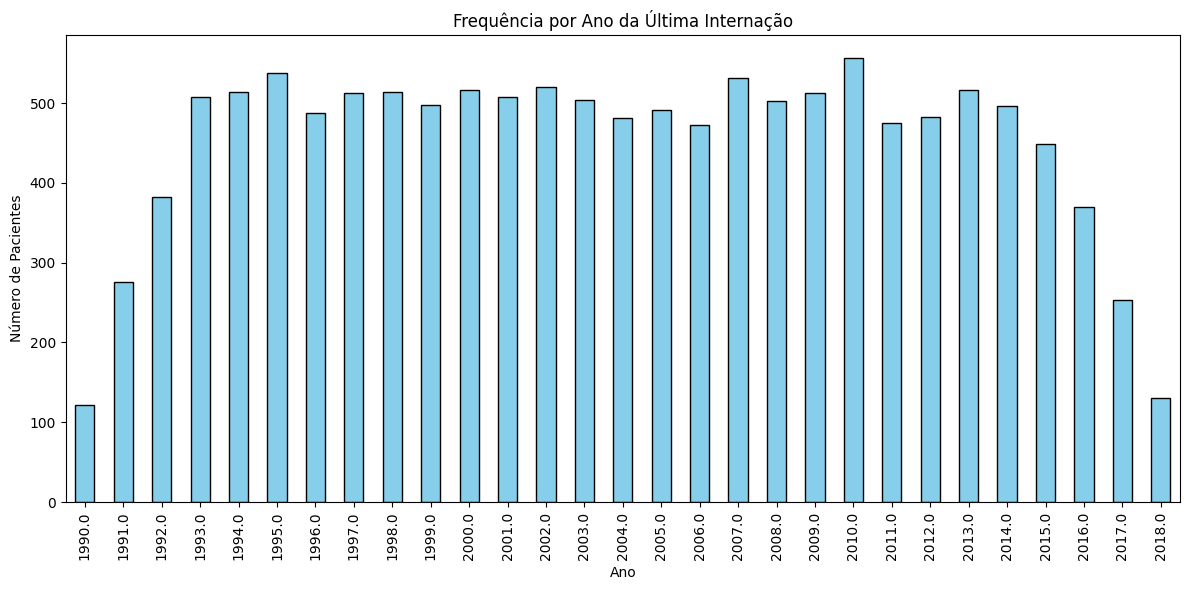

In [12]:
# Calcular a contagem de cada valor único
contagem = dados['ano_ultima_internacao'].value_counts().sort_index()

# Criar a figura com largura aumentada
plt.figure(figsize=(12, 6))  # 12 polegadas de largura e 6 de altura

# Plotar o gráfico de barras
contagem.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequência por Ano da Última Internação')
plt.xlabel('Ano')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [13]:
contagem.sort_values(ascending=False)

,count
ano_ultima_internacao,
2010.0,557
1995.0,538
2007.0,532
2002.0,520
2000.0,516
2013.0,516
1998.0,514
1994.0,514
1997.0,513


In [14]:
contagem.max()

557

In [15]:
percentual = dados['ano_ultima_internacao'].isnull().mean() * 100
total = dados.shape[0]
nulos = dados['ano_ultima_internacao'].isnull().sum()
maior_quantidade = contagem.max()

print(f'Do total de {total} registros, {nulos} são nulos gerando uma média de ({percentual:.2f}%) dos dados. O ano que possui maior quantidade possui {maior_quantidade} registros')

Do total de 25000 registros, 11881 são nulos gerando uma média de (47.52%) dos dados. O ano que possui maior quantidade possui 557 registros


**Ação**
Remover a coluna

In [16]:
#baseado no percentual de dados nulos, foi escolhido retirar o campo ano_ultima_internacao do modelo
dados.drop('ano_ultima_internacao', axis=1, inplace=True)

In [17]:
dados.shape

(25000, 23)

# **IMC**

In [18]:
dados['imc'].value_counts()

,count
imc,
29.7,189
30.7,186
28.1,181
30.6,171
30.3,164
...,...
15.0,1
66.8,1
94.0,1


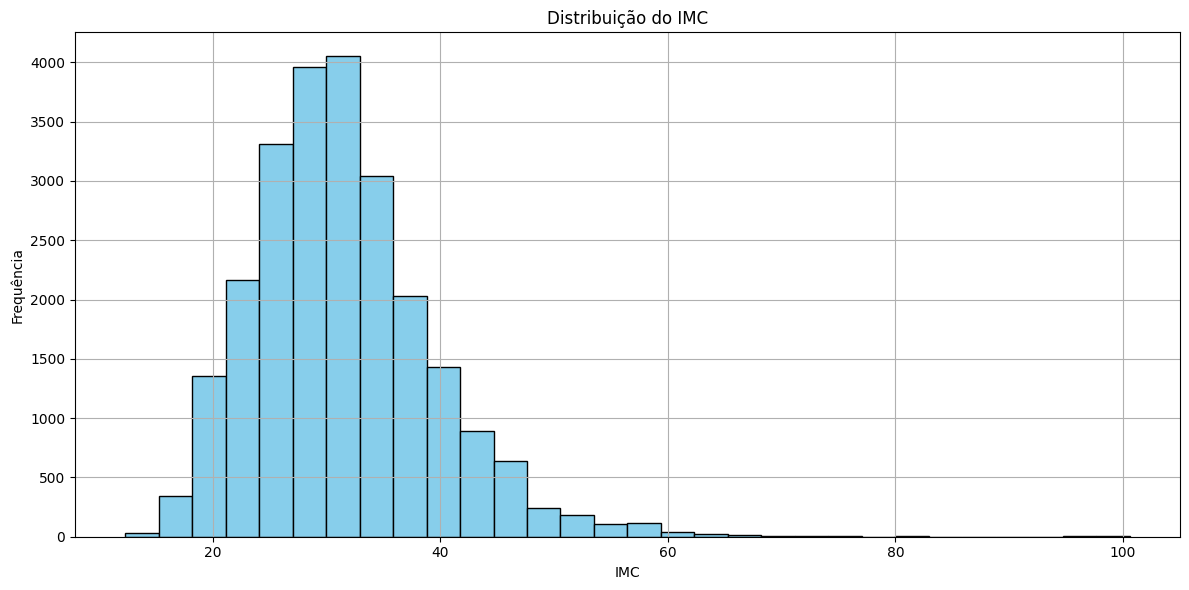

In [19]:
# histograma por se tratar de dados decimais
plt.figure(figsize=(12, 6))
plt.hist(dados['imc'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição do IMC')
plt.xlabel('IMC')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
percentual = dados['imc'].isnull().mean() * 100
total = dados.shape[0]
nulos = dados['imc'].isnull().sum()

print(f'Do total de {total} registros, {nulos} são nulos gerando uma média de ({percentual:.2f}%) dos dados.')

Do total de 25000 registros, 990 são nulos gerando uma média de (3.96%) dos dados.


In [21]:
#criando coluna para armazenar imc nulo, auxiliando analise
dados_imc_nulos = dados
dados['imc_nulo'] = dados['imc'].isnull()
dados.head()

,id,anos_conosco,checkup_ultimo_ano,esportes_radicais,ocupacao,medico_ultimo_ano,colesterol,passos_diarios,idade,doencas_cardiacas,doencas_graves,genero,glicose,imc,tabagismo,localizacao,peso,outro_seguro,alcool,exercicios,variacao_peso_ultimo_ano,percentual_gordura,valor,imc_nulo
0,222302,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978,False
1,145132,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170,False
2,244767,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382,False
3,85953,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,Chennai,71,Y,Rare,No,3,37,27148,False
4,18163,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,Bangalore,74,N,No,Extreme,0,34,29616,False


<Figure size 1000x600 with 0 Axes>

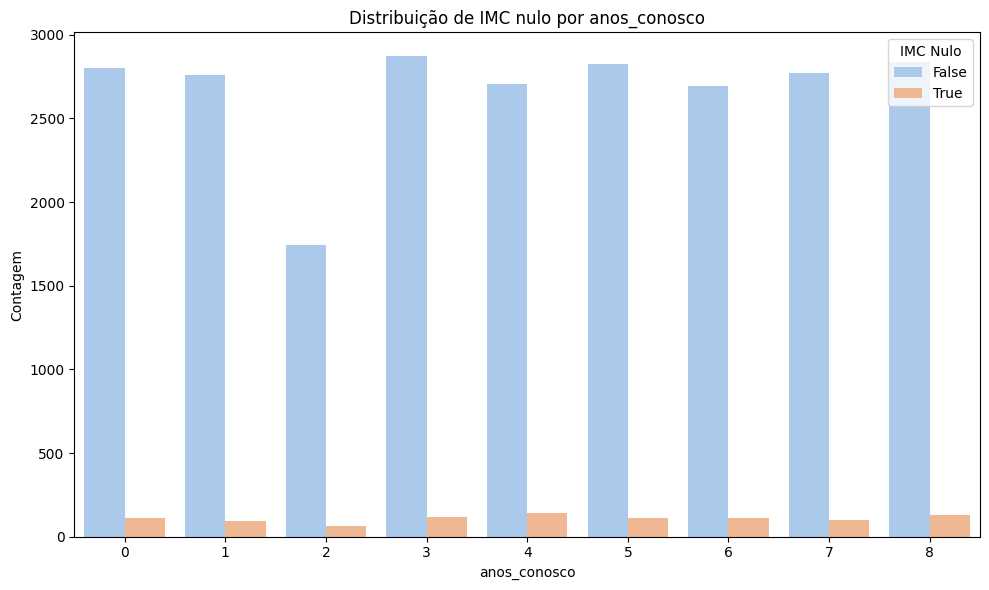

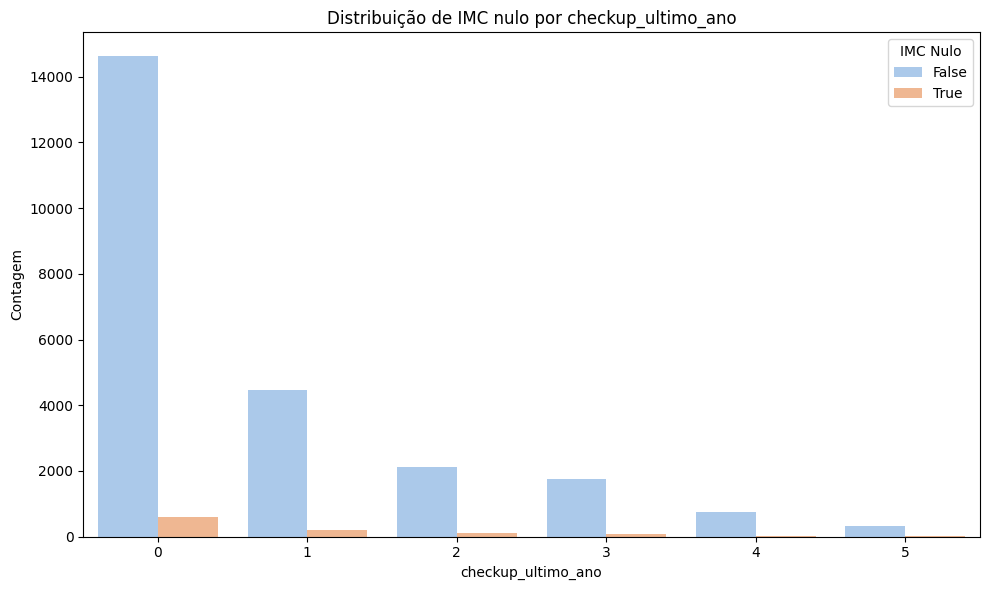

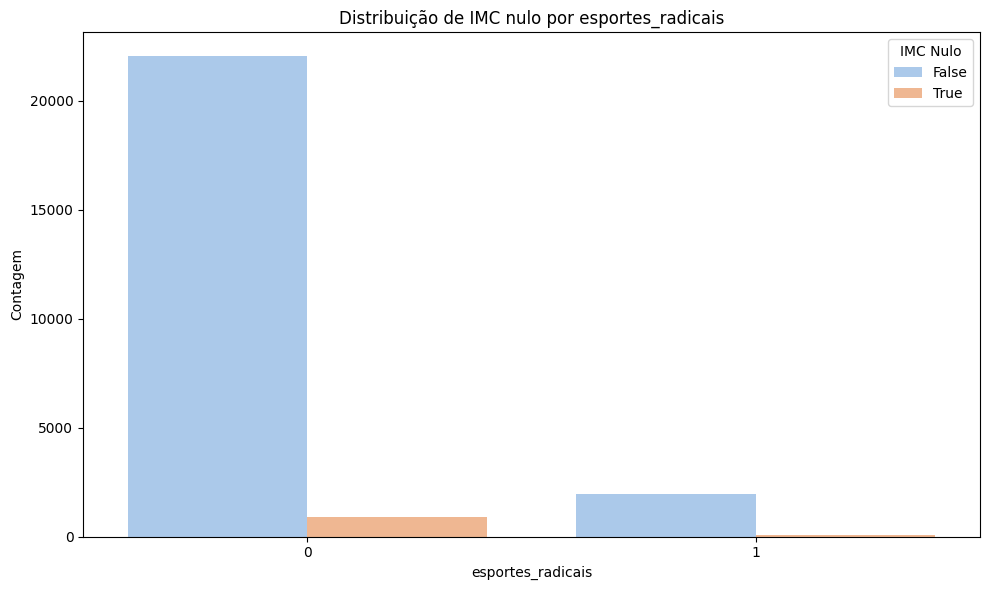

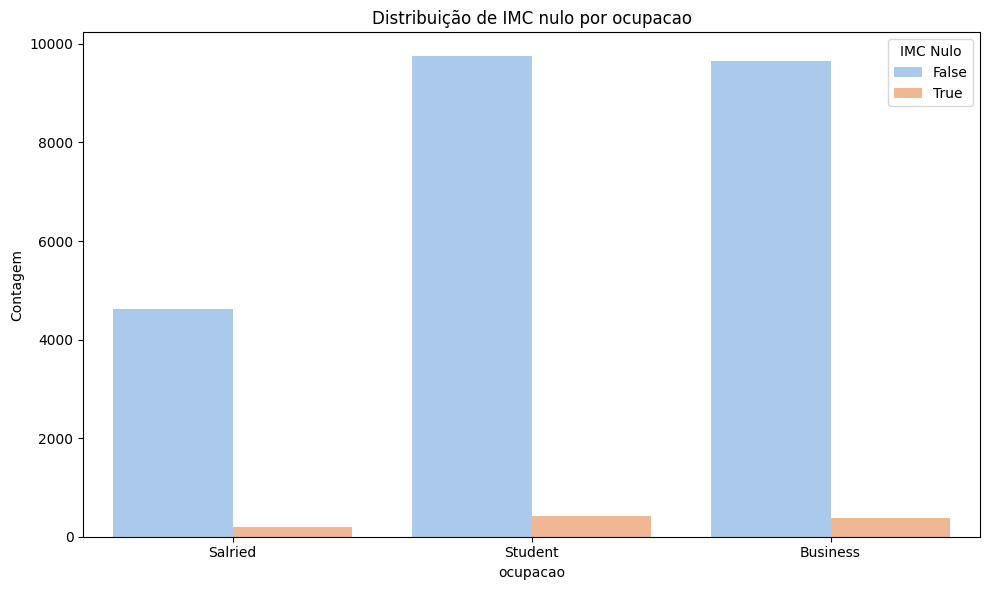

<Figure size 1000x600 with 0 Axes>

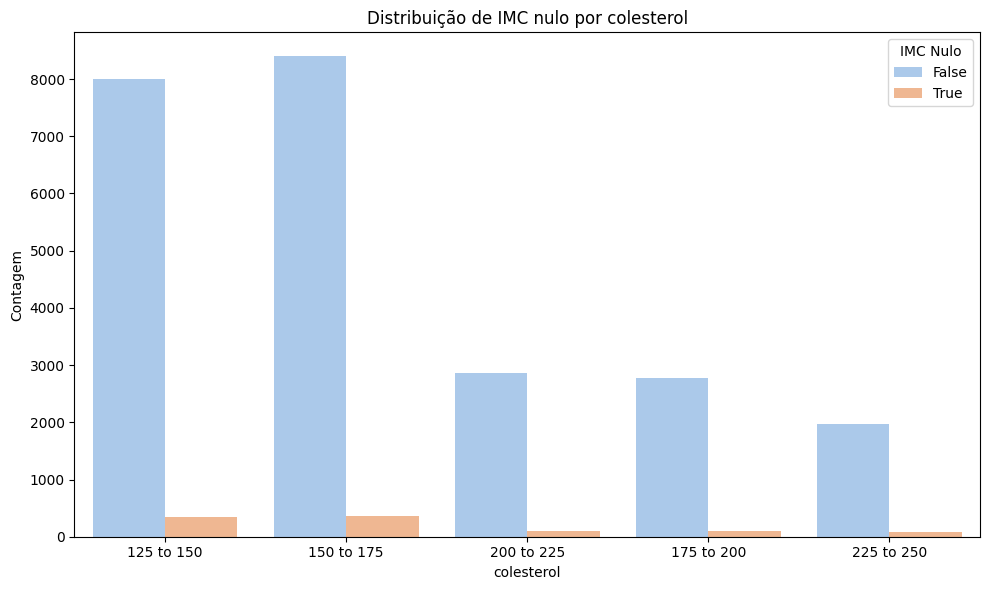

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

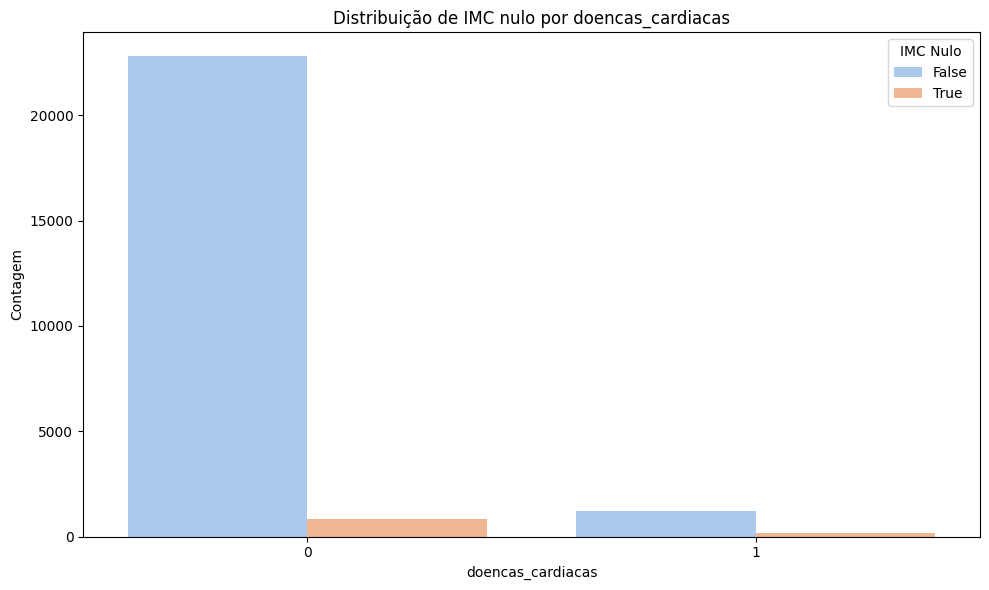

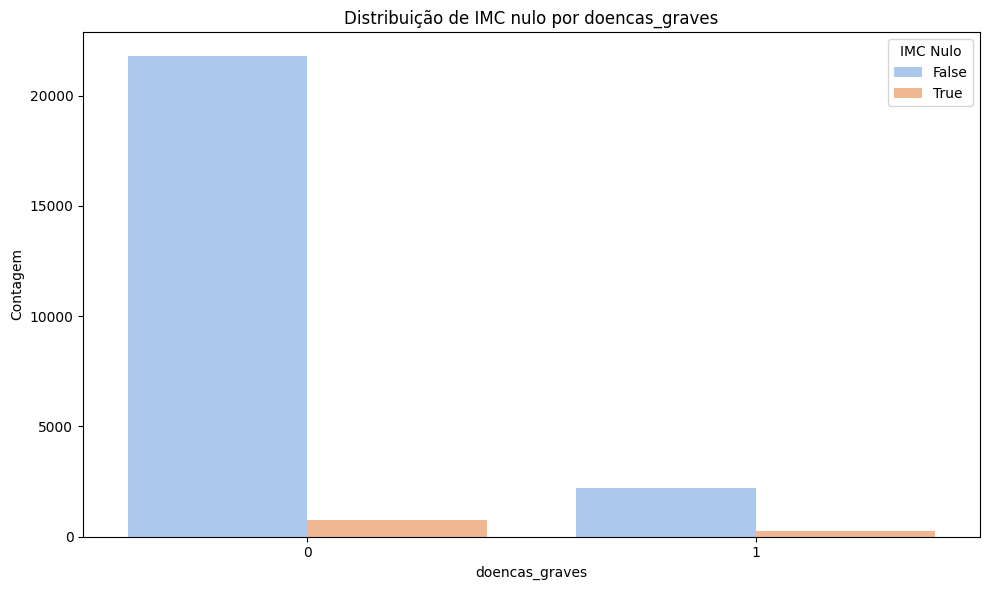

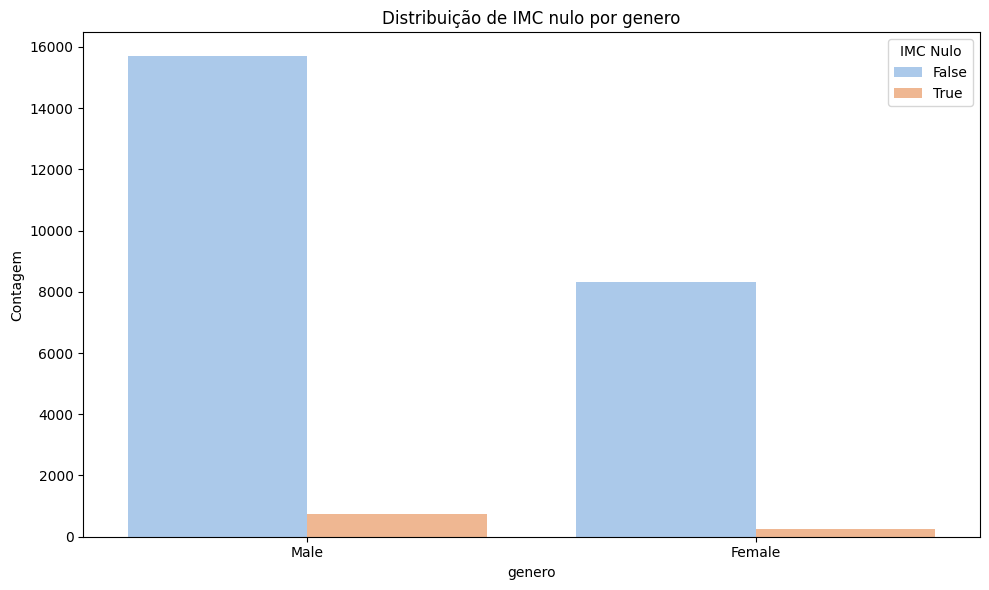

<Figure size 1000x600 with 0 Axes>

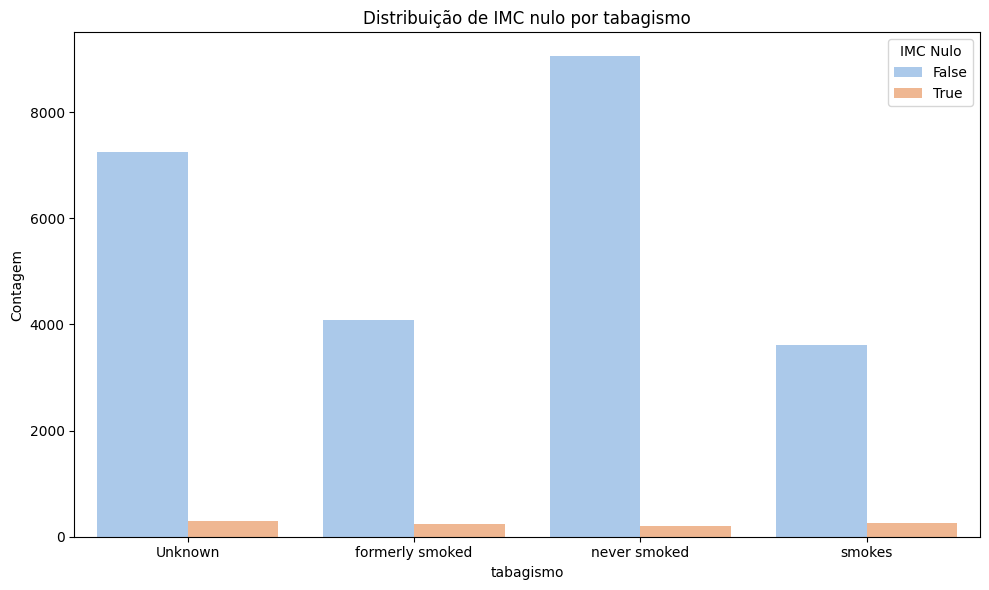

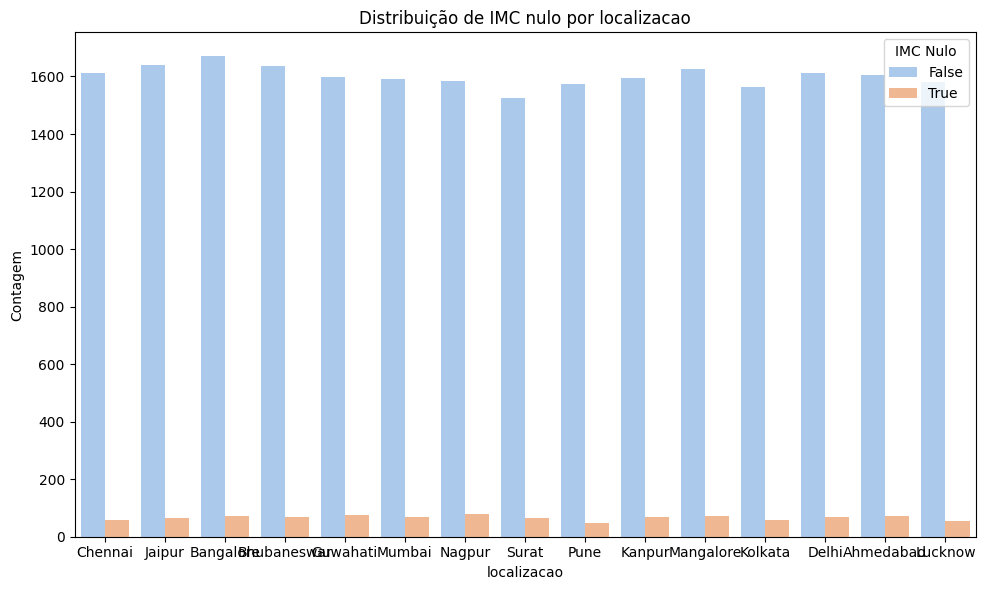

<Figure size 1000x600 with 0 Axes>

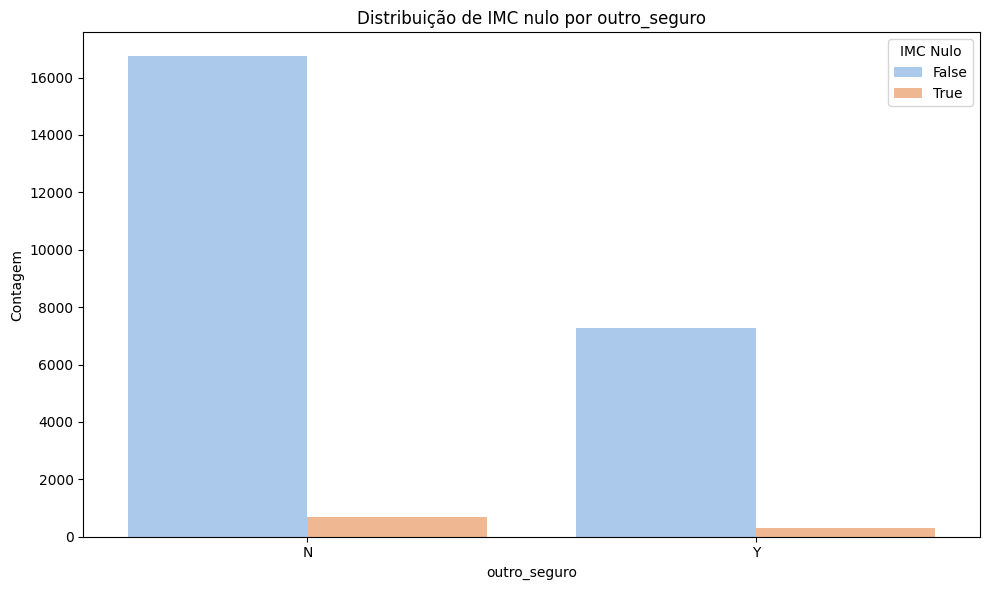

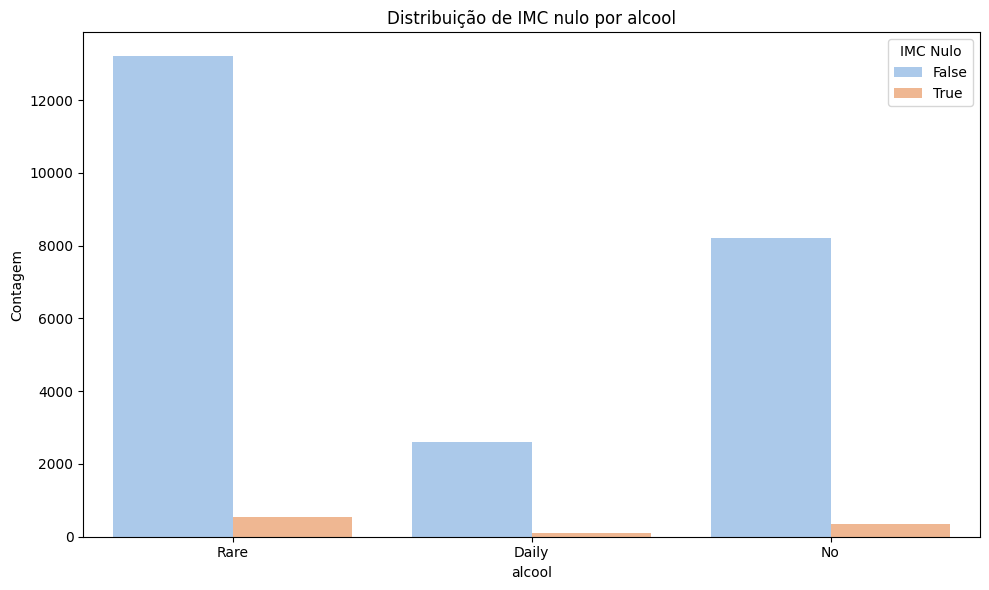

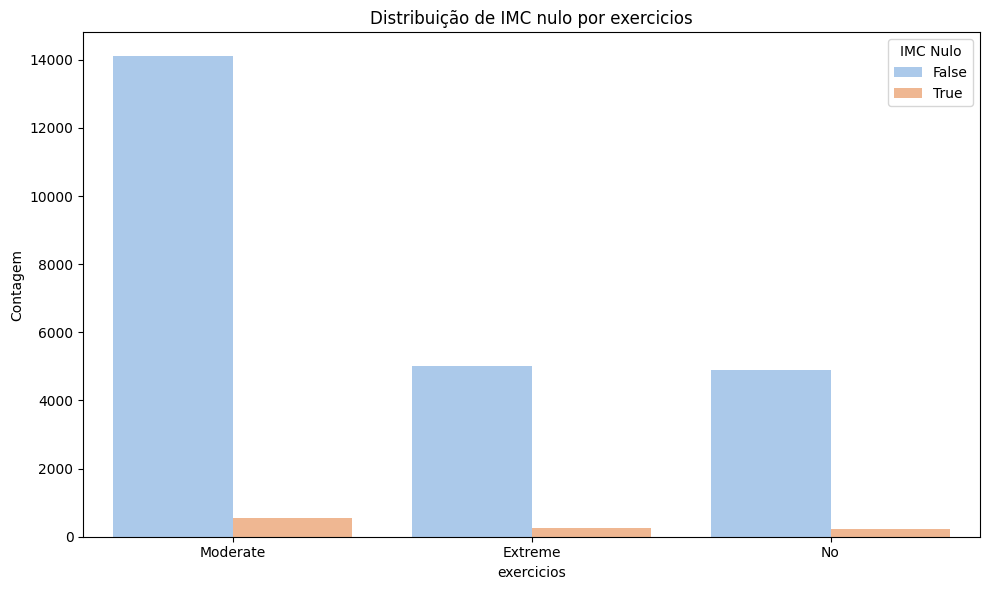

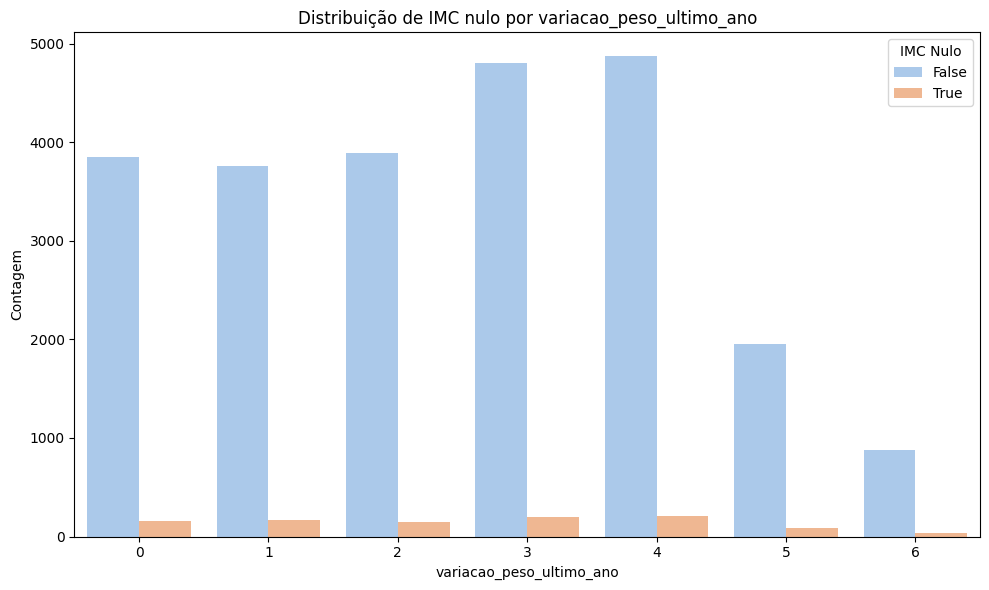

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [22]:
#comparação dos valores nulos com as variáveis categóricas
#gráfico de barras para variáveis categóricas
for coluna in dados.columns:
    if coluna not in ['imc', 'imc_nulo']:
        plt.figure(figsize=(10, 6))
        if dados[coluna].dtype == 'object' or dados[coluna].nunique() < 10:
            sns.countplot(data=dados, x=coluna, hue='imc_nulo', palette='pastel')
            plt.title(f'Distribuição de IMC nulo por {coluna}')
            plt.xlabel(coluna)
            plt.ylabel('Contagem')
            plt.legend(title='IMC Nulo')
        plt.tight_layout()
        plt.show()

<ipython-input-23-bf6ba2028fd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')


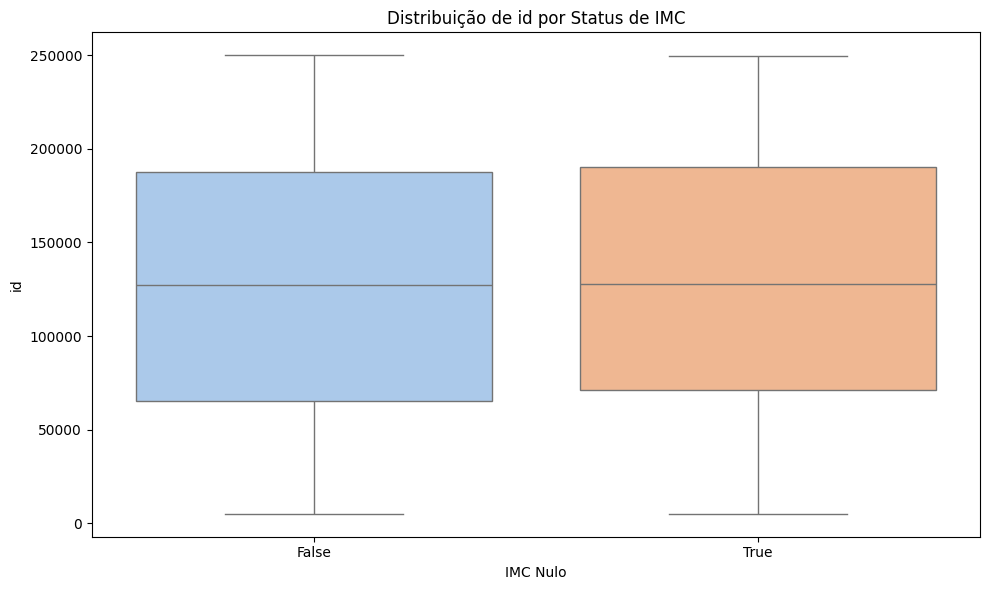

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<ipython-input-23-bf6ba2028fd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')


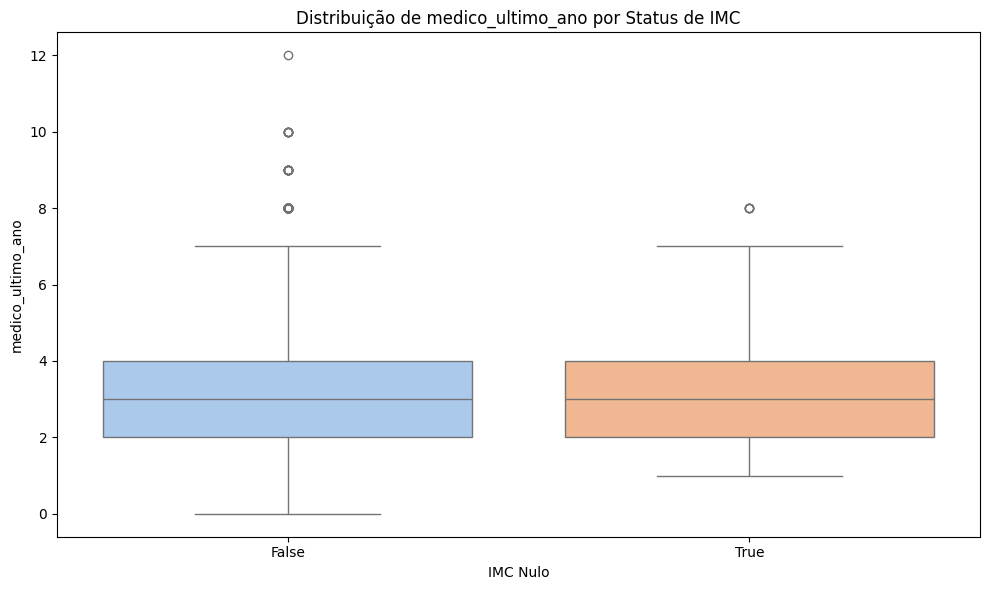

<Figure size 1000x600 with 0 Axes>

<ipython-input-23-bf6ba2028fd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')


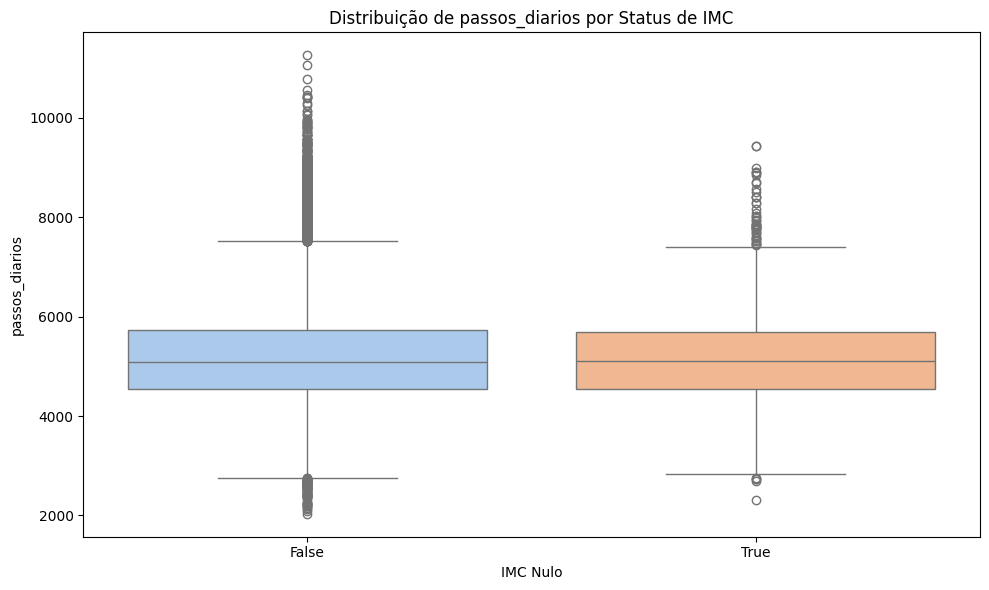

<ipython-input-23-bf6ba2028fd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')


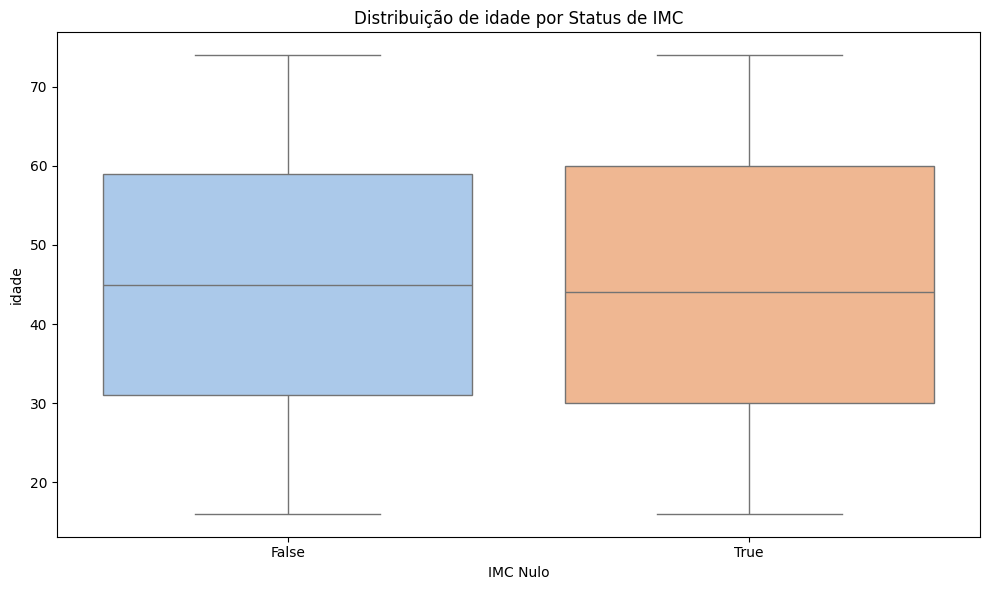

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<ipython-input-23-bf6ba2028fd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')


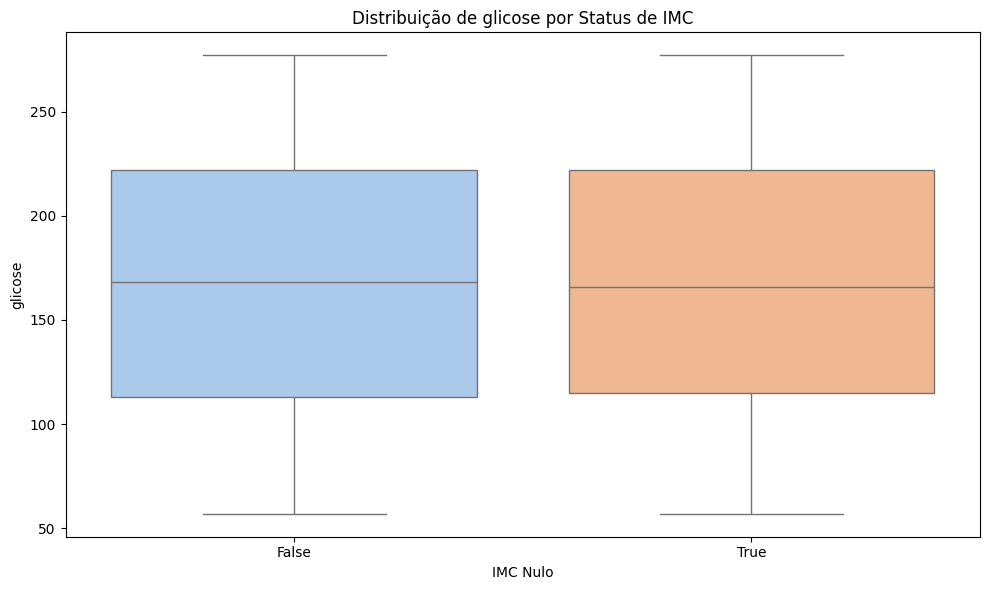

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<ipython-input-23-bf6ba2028fd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')


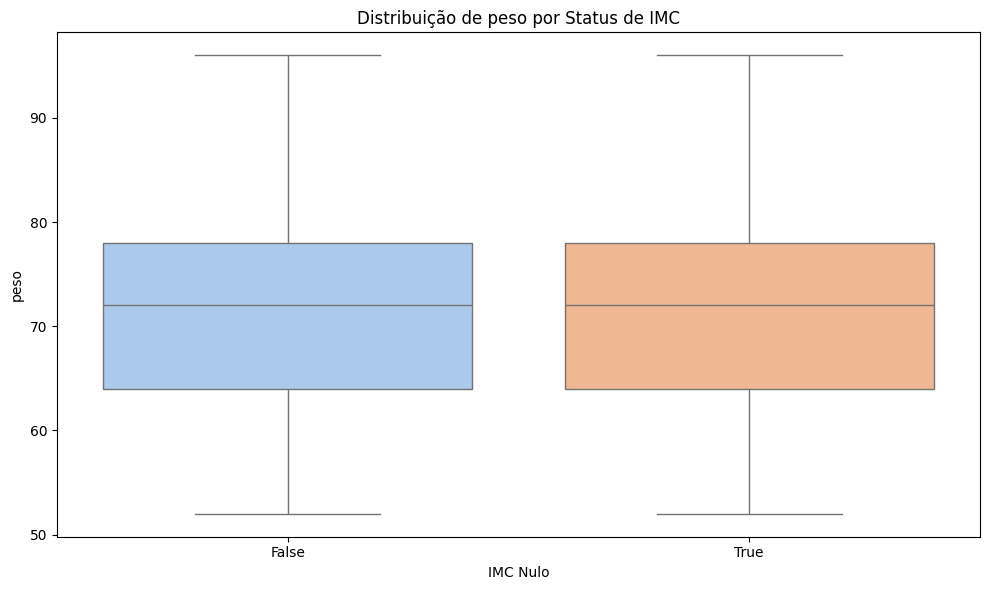

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<ipython-input-23-bf6ba2028fd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')


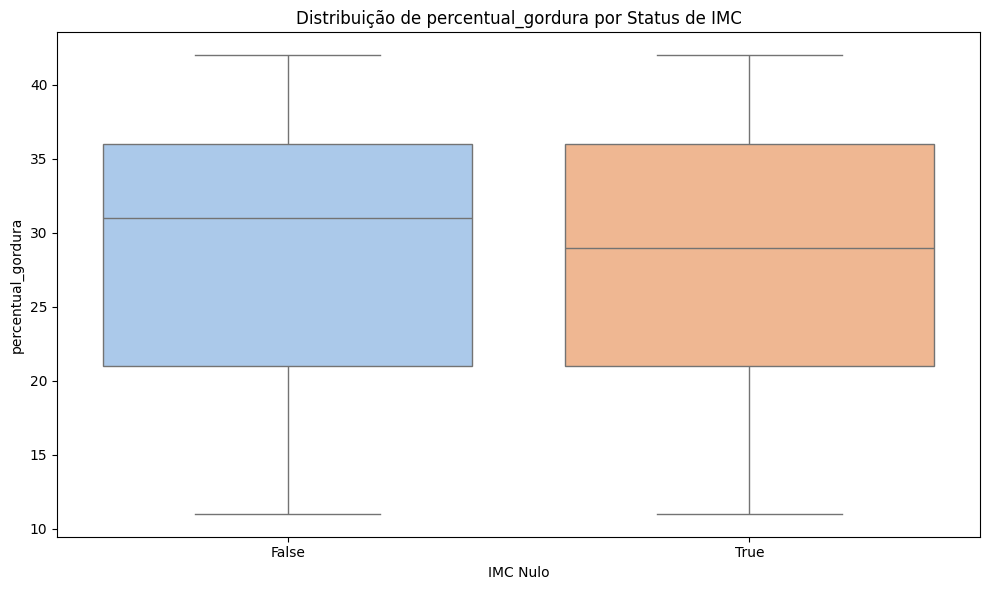

<ipython-input-23-bf6ba2028fd9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')


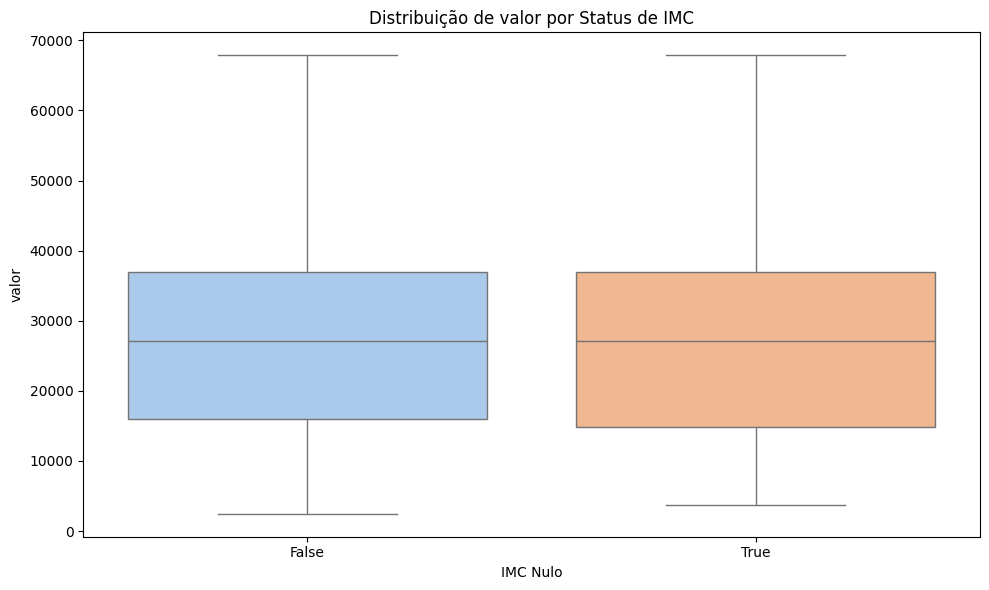

In [23]:
#comparação dos valores nulos com as variáveis numéricas
#boxplot para variáveis numéricas
for coluna in dados.columns:
    if coluna not in ['imc', 'imc_nulo']:
        plt.figure(figsize=(10, 6))
        if not( dados[coluna].dtype == 'object' or dados[coluna].nunique() < 10):
            sns.boxplot(data=dados, x='imc_nulo', y=coluna, palette='pastel')
            plt.title(f'Distribuição de {coluna} por Status de IMC')
            plt.xlabel('IMC Nulo')
            plt.ylabel(coluna)
        plt.tight_layout()
        plt.show()

In [24]:
#removendo a coluna auxiliar utilizada pata plotar
dados.drop('imc_nulo', axis=1, inplace=True)

**Ação**
Remover as linhas com imc nulo

In [25]:
#desta vez, a quantidade de dados nulos é menor que 4% e estão bem distribuídos perante todas as outras variáveis, fazendo optar por apagar as linhas que contém nulo
dados.dropna(subset=['imc'], inplace=True)

In [26]:
dados.shape

(24010, 23)

In [27]:
dados.head()

,id,anos_conosco,checkup_ultimo_ano,esportes_radicais,ocupacao,medico_ultimo_ano,colesterol,passos_diarios,idade,doencas_cardiacas,doencas_graves,genero,glicose,imc,tabagismo,localizacao,peso,outro_seguro,alcool,exercicios,variacao_peso_ultimo_ano,percentual_gordura,valor
0,222302,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978
1,145132,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170
2,244767,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382
3,85953,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,Chennai,71,Y,Rare,No,3,37,27148
4,18163,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,Bangalore,74,N,No,Extreme,0,34,29616


# **ID**

In [28]:
dados['id'].value_counts()

,count
id,
191315,4
207026,4
130247,3
231970,3
156528,3
...,...
101142,1
63337,1
183328,1


In [29]:
dados['id'].value_counts()[lambda x: x > 1]

,count
id,
191315,4
207026,4
130247,3
231970,3
156528,3
...,...
75029,2
199786,2
209278,2


In [30]:
#Em um cenário normal, o ID não se repitiria, como este se repete, verificamos se é referente ao mesmo cliente/paciente
#neste cado, o mesmo id é de um home e de uma mulher
dados[lambda x: dados['id'] == 191315].head()

,id,anos_conosco,checkup_ultimo_ano,esportes_radicais,ocupacao,medico_ultimo_ano,colesterol,passos_diarios,idade,doencas_cardiacas,doencas_graves,genero,glicose,imc,tabagismo,localizacao,peso,outro_seguro,alcool,exercicios,variacao_peso_ultimo_ano,percentual_gordura,valor
8201,191315,6,3,0,Business,4,200 to 225,6047,42,0,0,Female,167,24.7,Unknown,Kanpur,64,Y,Rare,Extreme,4,42,16042
15865,191315,3,0,0,Business,3,150 to 175,4561,62,1,0,Male,182,37.2,smokes,Jaipur,66,N,Rare,Moderate,4,36,20978
18070,191315,5,0,0,Business,5,175 to 200,5201,45,0,0,Female,178,19.4,Unknown,Kolkata,65,N,Rare,Moderate,1,37,19744
18164,191315,3,0,0,Business,2,150 to 175,5074,39,0,0,Male,145,38.1,smokes,Guwahati,85,N,No,Moderate,4,36,49360


In [31]:
dados[lambda x: dados['id'] == 207026].head()

,id,anos_conosco,checkup_ultimo_ano,esportes_radicais,ocupacao,medico_ultimo_ano,colesterol,passos_diarios,idade,doencas_cardiacas,doencas_graves,genero,glicose,imc,tabagismo,localizacao,peso,outro_seguro,alcool,exercicios,variacao_peso_ultimo_ano,percentual_gordura,valor
1838,207026,7,0,0,Business,4,150 to 175,4390,24,0,0,Female,228,18.2,Unknown,Bhubaneswar,67,Y,No,Moderate,0,36,18510
13711,207026,8,0,0,Student,3,150 to 175,4463,73,0,0,Female,123,37.5,Unknown,Jaipur,71,N,Rare,Moderate,2,35,24680
15141,207026,2,0,1,Student,4,125 to 150,5212,70,0,0,Female,153,20.9,Unknown,Bangalore,69,N,Rare,Moderate,3,16,20978
24705,207026,1,0,0,Business,4,150 to 175,3840,50,0,0,Male,228,53.2,never smoked,Jaipur,66,N,No,Extreme,1,21,13574


In [32]:
#não se trata do mesmo cliente/paciente
print(dados['id'].nunique())

22854


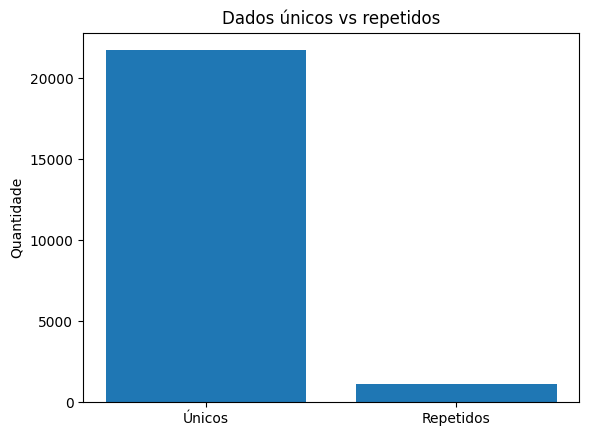

In [33]:
counts = dados['id'].value_counts()
plt.bar(['Únicos', 'Repetidos'], [(counts == 1).sum(), (counts > 1).sum()])
plt.title('Dados únicos vs repetidos')
plt.ylabel('Quantidade')
plt.show()

**Ação**
Retirar a coluna ID

In [34]:
#coluna utilizada como chave, porém com duplicidade, quase todos os dados são unicos e não fariam sentido para o modelo, por isso a coluna será removida
dados.drop('id', axis=1, inplace=True)

# **Tratamento de dados Numéricos**

In [35]:
#separando as variáveis numéricas, exceto a variável target
numericas = dados.select_dtypes(include=['int64', 'float64']).drop(columns='valor')
print(numericas.columns)

Index(['anos_conosco', 'checkup_ultimo_ano', 'esportes_radicais',
       'medico_ultimo_ano', 'passos_diarios', 'idade', 'doencas_cardiacas',
       'doencas_graves', 'glicose', 'imc', 'peso', 'variacao_peso_ultimo_ano',
       'percentual_gordura'],
      dtype='object')


In [36]:
print(numericas.describe())

       anos_conosco  checkup_ultimo_ano  esportes_radicais  medico_ultimo_ano  \
count  24010.000000        24010.000000       24010.000000       24010.000000   
mean       4.085173            0.773719           0.081924           3.105414   
std        2.607822            1.200497           0.274255           1.143030   
min        0.000000            0.000000           0.000000           0.000000   
25%        2.000000            0.000000           0.000000           2.000000   
50%        4.000000            0.000000           0.000000           3.000000   
75%        6.000000            1.000000           0.000000           4.000000   
max        8.000000            5.000000           1.000000          12.000000   

       passos_diarios         idade  doencas_cardiacas  doencas_graves  \
count    24010.000000  24010.000000       24010.000000    24010.000000   
mean      5215.863265     44.918867           0.050229        0.092545   
std       1053.556213     16.087804           0.

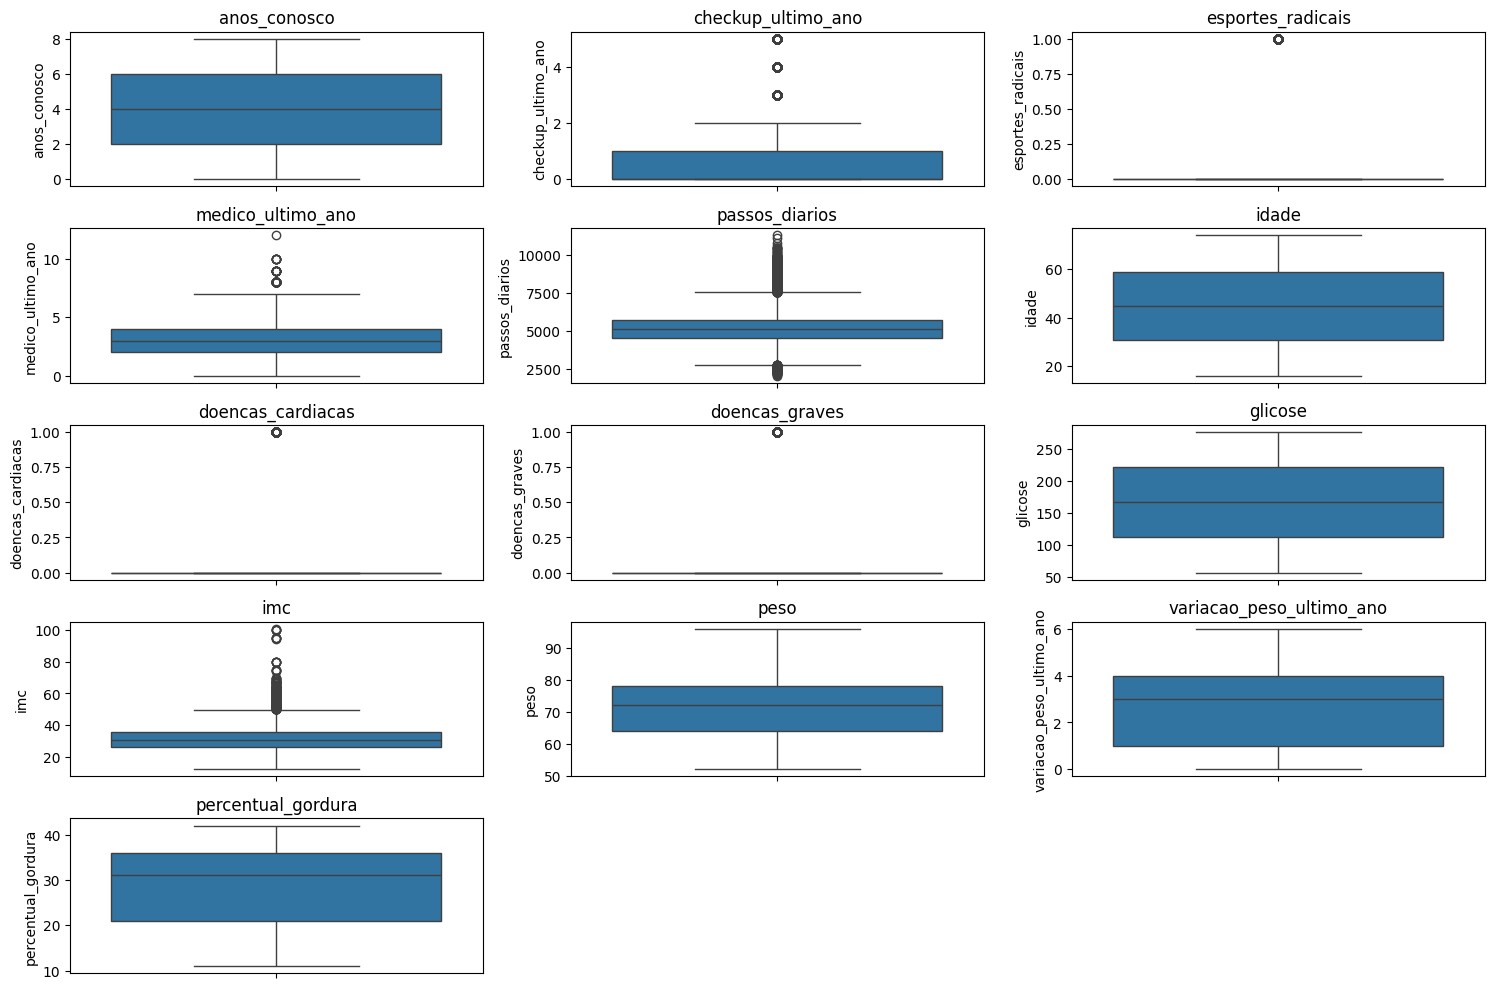

In [37]:

# Plotar boxplots para todas as variáveis numéricas para uma visão geral inicial, volto para analisar cada possóvel outlier
plt.figure(figsize=(15, 10))
for i, col in enumerate(numericas.columns):
    plt.subplot((len(numericas.columns)+2)//3, 3, i+1)
    sns.boxplot(y=dados[col])
    plt.title(col)
plt.tight_layout()
plt.show()

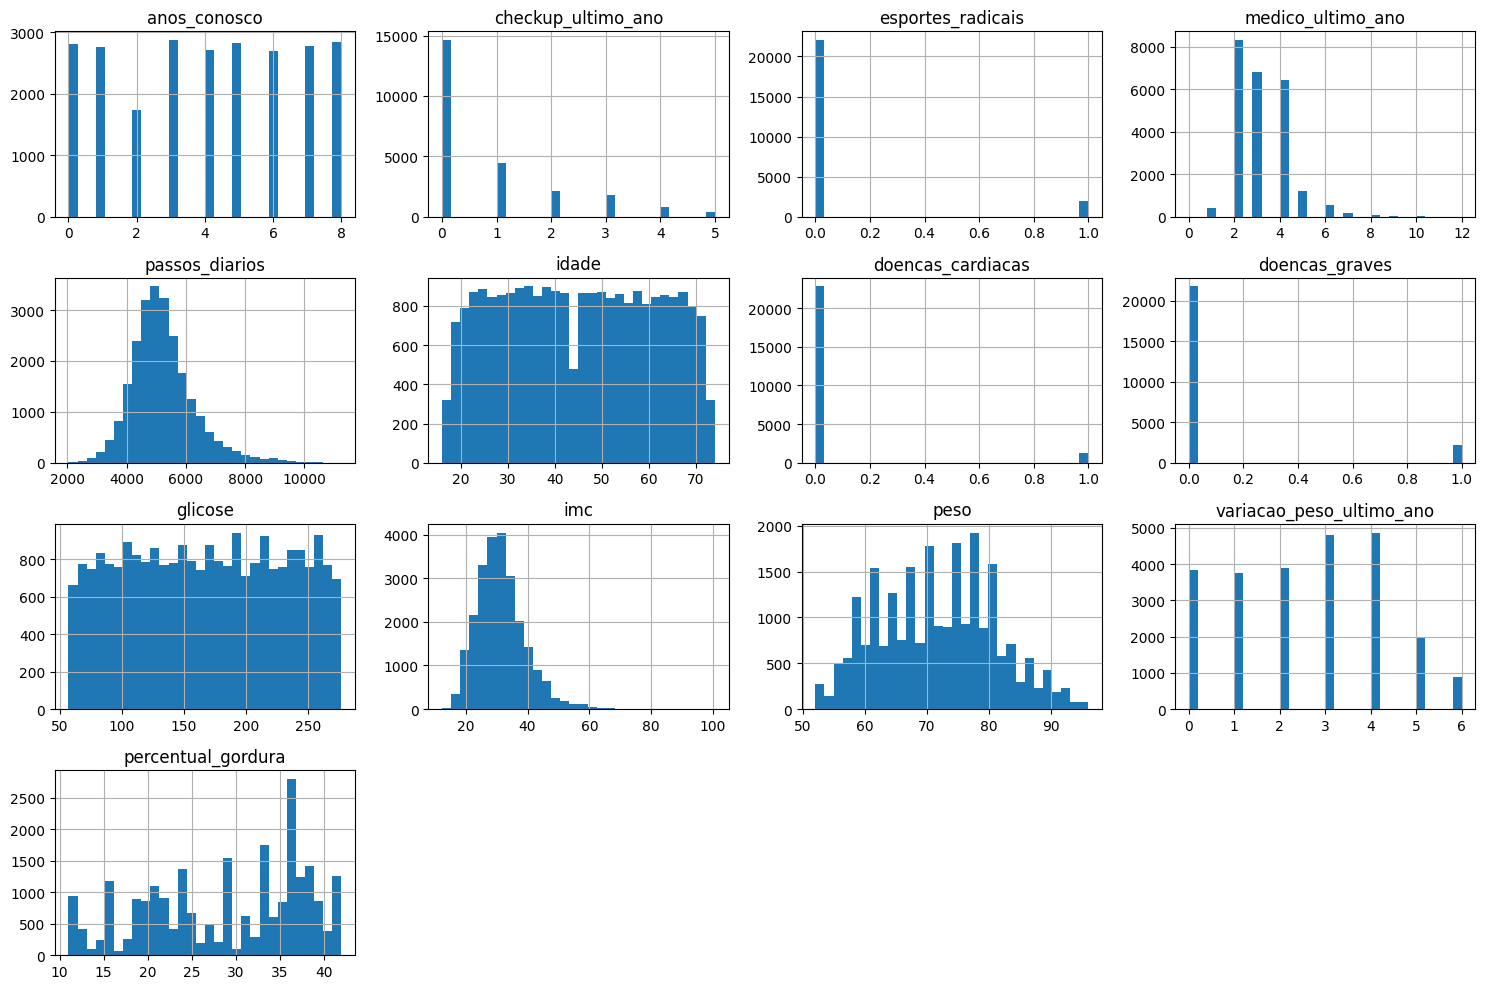

In [38]:
# Histograma para ver distribuição para uma visão geral inicial, depois analisar cada caso
numericas.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

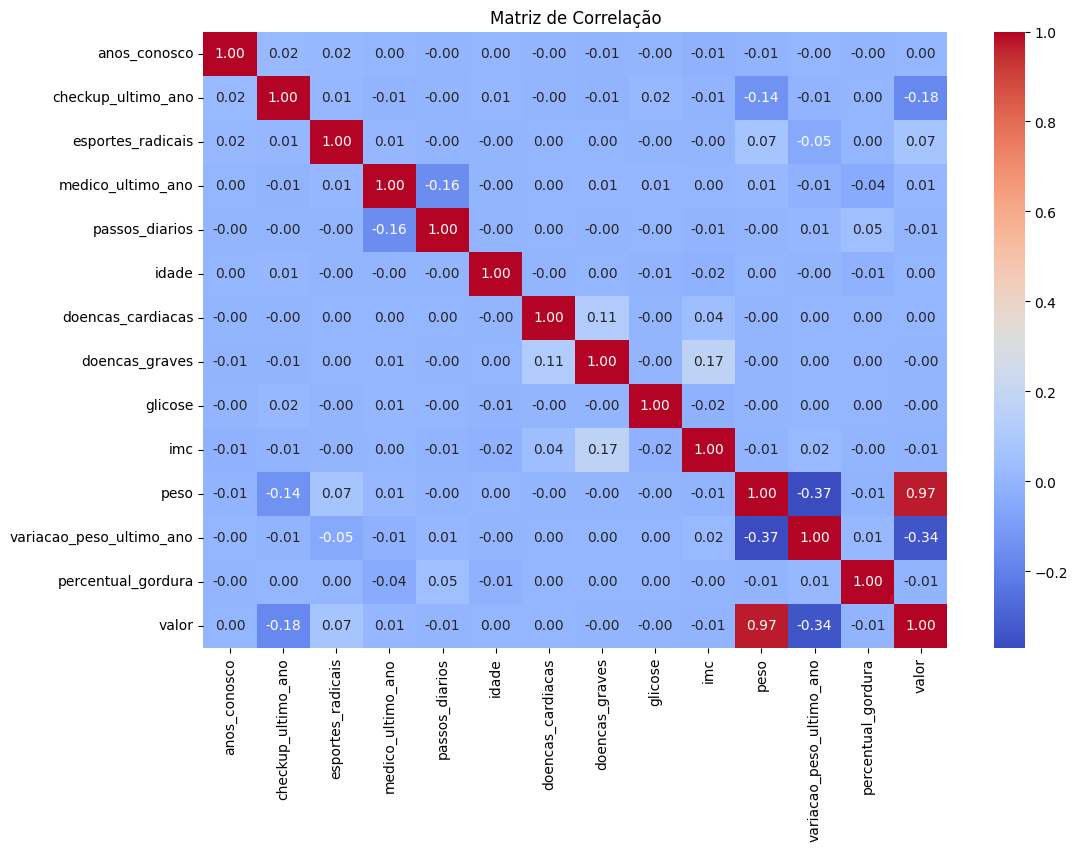

valor                       1.000000
peso                        0.970460
esportes_radicais           0.074257
medico_ultimo_ano           0.008267
idade                       0.004289
doencas_cardiacas           0.001423
anos_conosco                0.001385
doencas_graves             -0.001334
glicose                    -0.003942
passos_diarios             -0.005218
percentual_gordura         -0.008072
imc                        -0.008231
checkup_ultimo_ano         -0.175484
variacao_peso_ultimo_ano   -0.341177
Name: valor, dtype: float64


In [39]:
# Correlação entre todas as variáveis numéricas
correlacoes = dados[numericas.columns.tolist() + ['valor']].corr()

# Heatmap de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Correlação com o target
correlacoes_com_target = correlacoes['valor'].sort_values(ascending=False)
print(correlacoes_com_target)

In [40]:
correlacao = dados.corr(numeric_only=True)['valor'].sort_values(ascending=False)
print(correlacao.head(10))

valor                1.000000
peso                 0.970460
esportes_radicais    0.074257
medico_ultimo_ano    0.008267
idade                0.004289
doencas_cardiacas    0.001423
anos_conosco         0.001385
doencas_graves      -0.001334
glicose             -0.003942
passos_diarios      -0.005218
Name: valor, dtype: float64


# **Conclusão**

Este modelo não é confiável para este trablaho, visto que a target(valor) parece ter sido desenvolvido em conjunto com o Peso ocorrendo uma correlação muito próxima de 1, outra observação é que a correlação entre IMC e peso é paricamente 0

Será necessário encontrar outro modelo para o trabalho proposto